In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
weather = pd.read_excel('./20201008.xlsx')

In [4]:
for i in range(len(weather)):
    weather['Local time in Jeju (airport)'].iloc[i] = datetime.datetime.strptime(weather['Local time in Jeju (airport)'].iloc[i], '%d.%m.%Y %H:%M')
    
weather['Local time in Jeju (airport)'] = pd.to_datetime(weather['Local time in Jeju (airport)'], format='%Y-%m-%d %H:%M:%s', errors='raise')
weather['Date'] = weather['Local time in Jeju (airport)'].dt.date
weather['WW'][weather['WW'].notnull()] = 1
weather['WW'][weather['WW'].isnull()] = 0
weather['WW'] = pd.to_numeric(weather['WW'])


C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
temp_rain = weather.groupby('Date',as_index=False).mean()
temp_rain = temp_rain.drop(['P0','P','U','Ff','ff10',"W'W'",'Td'],axis=1)
temp_rain.rename(columns={'WW':'rain'},inplace=True)
temp_rain['Date'] = temp_rain['Date'].astype(str)

In [6]:
weather

,Local time in Jeju (airport),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Date
0,2020-10-08 16:00:00,21,762.6,765.8,60,Wind blowing from the east,12,NaN,0,NaN,Scattered clouds (40-50%) 1200 m,10.0 and more,13,2020-10-08
1,2020-10-08 15:00:00,21,761.8,765.0,64,Wind blowing from the east,13,NaN,0,NaN,Broken clouds (60-90%) 1050 m,10.0 and more,14,2020-10-08
2,2020-10-08 14:00:00,22,761.8,765.0,57,Wind blowing from the east,15,NaN,0,NaN,Scattered clouds (40-50%) 1050 m,10.0 and more,13,2020-10-08
3,2020-10-08 13:00:00,22,763.4,766.6,65,Wind blowing from the east,13,NaN,0,NaN,Broken clouds (60-90%) 1050 m,10.0 and more,15,2020-10-08
4,2020-10-08 12:00:00,22,763.4,766.6,61,Wind blowing from the east,13,NaN,0,NaN,Broken clouds (60-90%) 900 m,10.0 and more,14,2020-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13973,2019-04-16 04:00:00,9,761.0,764.3,58,Wind blowing from the south-southeast,2,NaN,0,NaN,No Significant Clouds,10.0 and more,1,2019-04-16
13974,2019-04-16 03:00:00,10,761.0,764.3,54,Wind blowing from the south-east,2,NaN,0,NaN,No Significant Clouds,10.0 and more,1,2019-04-16
13975,2019-04-16 02:00:00,10,761.0,764.3,58,Wind blowing from the south-southeast,2,NaN,0,NaN,No Significant Clouds,10.0 and more,2,2019-04-16
13976,2019-04-16 01:00:00,11,761.7,765.0,54,Wind blowing from the south-southeast,2,NaN,0,NaN,No Significant Clouds,10.0 and more,2,2019-04-16


In [7]:
data = pd.read_csv('./predata.csv')
data.drop(['year','month','Unnamed: 0'],axis=1,inplace=True)

In [8]:
place = pd.read_excel('evpass_tb_opr_station.xlsx') #길거리에 Iot 있는 킥보드가 있는 장소

In [9]:
data['Xpos'] = None
data['Ypos']= None

#위치 추가
for i in range(len(data)):
    for j in range(len(place)):
        if(data['rent_station'].iloc[i] == place['id'].iloc[j]):
            data['Xpos'].iloc[i] = float(round(place['x_pos'].iloc[j],3))
            data['Ypos'].iloc[i] = float(round(place['y_pos'].iloc[j],3))

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
data['Xpos'] = data['Xpos'].astype('float')
data['Ypos'] = data['Ypos'].astype('float')

In [11]:
data = data.iloc[:4718] #10월 8일 이후 데이터 자르기위함

## 지역 여러개 데이터 분할

In [12]:
data['Sector'] = 0
NineSector_data = data.copy()
TwoSector_data = data.copy()
OneSector_data = data.copy()
FourSector_data = data.copy()

# ========================================================

In [13]:
def preprocessing(data):
    data['rent_date'] = pd.to_datetime(data['rent_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    data['year'] =data['rent_date'].dt.year
    data['month'] =data['rent_date'].dt.month
    data['day'] =data['rent_date'].dt.day
    data['day_name'] = data['rent_date'].dt.day_name()
    data = data.sort_values(by='rent_date')
    data['rent_date'] = data['rent_date'].astype(str)
    data['T'] = None
    data['rain'] = None
    return data

In [14]:
def temp_rain_preprocessing(data,length,temp_length):
    for i in range(temp_length):
        for j in range(length):
            if(data['rent_date'].iloc[j] == temp_rain['Date'].iloc[i]):
                data['T'].iloc[j] = temp_rain['T'].iloc[i]
                data['rain'].iloc[j] = temp_rain['rain'].iloc[i]
                if(data['rain'].iloc[j]>0):
                    data['rain'].iloc[j] = 0
                else:
                    data['rain'].iloc[j] = 1
    data['T'] = data['T'].astype(int)
    data['rent_date']=pd.to_datetime(data['rent_date'])
    return data

In [15]:
def weekend_weekday_preprocessing(data,length):
    data['weekend'] = None
    for i in range(length):
        if(('Friday' == data['day_name'].iloc[i]) or ('Saturday'== data['day_name'].iloc[i]) or ('Sunday' == data['day_name'].iloc[i])):
            data['weekend'].iloc[i] = 1
        else:
            data['weekend'].iloc[i] = 0

    data['weekend']=data['weekend'].astype(int)
    return data

In [16]:
def dummy_preprocessing(data):
    data['weekday'] = data['rent_date'].dt.weekday
    data = pd.get_dummies(data,columns=['weekday'])
    data = pd.get_dummies(data,columns=['month'])
    data = pd.get_dummies(data,columns=['year'])
    return data

In [17]:
def WholePreprocessing(data):
    data = data.groupby(['rent_date','Sector'],as_index=False).sum()
    length = len(data)
    temp_length = len(temp_rain)
    data = preprocessing(data)
    data = temp_rain_preprocessing(data,length,temp_length)
    data = weekend_weekday_preprocessing(data,length)
    data = dummy_preprocessing(data)
    data.drop(['day_name','Xpos','Ypos'],axis=1,inplace=True)
    return data

# 지역 한개 모델

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import make_scorer, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


In [19]:
OneSector_data

,rent_date,rent_number,rent_station,day,day_name,Xpos,Ypos,Sector
0,2020-04-03,1,EVS_000083,3,Friday,33.461,126.512,0
1,2020-04-03,1,EVS_000083,3,Friday,33.461,126.512,0
2,2020-04-03,1,EVS_000083,3,Friday,33.461,126.512,0
3,2020-04-03,1,EVS_000083,3,Friday,33.461,126.512,0
4,2020-04-03,1,EVS_000083,3,Friday,33.461,126.512,0
...,...,...,...,...,...,...,...,...
4713,2020-10-06,3,EVS_000001,6,Tuesday,33.518,126.499,0
4714,2020-10-06,7,EVS_000006,6,Tuesday,33.379,126.216,0
4715,2020-10-06,1,EVS_000085,6,Tuesday,33.461,126.512,0
4716,2020-10-06,2,EVS_000161,6,Tuesday,33.541,126.635,0


In [20]:
from mlens.ensemble import SuperLearner
from mlens.ensemble import BlendEnsemble

[MLENS] backend: threading


In [21]:
def model_training(data,test_size):
    X_data = data.drop(['rent_date','rent_number'],axis=1)
    y_data = data['rent_number']
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=test_size,random_state=13)
    xlf = BlendEnsemble()
    xlf.add(RandomForestRegressor())
    xlf.add(xgb.XGBRFRegressor())
    xlf.add(lgb.LGBMRegressor())
    xlf.fit(X_train, y_train)
    return xlf, X_train,X_test,y_train,y_test

In [22]:
def PrintResult(y_test,xlf,X_test):

    original_y_test_index=y_test.index
    y_test.index = range(len(y_test)) 
    xgb_preds = xlf.predict(X_test)
    xgb_preds = xgb_preds.astype(int)
    print('RMSE: ', sqrt(mean_squared_error(y_test,xgb_preds)))
    print("R2 SCORE", round(r2_score(y_test, xgb_preds), 2))
    return original_y_test_index,xgb_preds

In [23]:
def Plot(xgb_preds,y_test):

    fig, axes = plt.subplots(1,1,figsize=(8,4))
    axes.plot(xgb_preds,'r',label='predictions_value')
    axes.plot(y_test,label='real_value')
    axes.set_xlabel('dataset')
    axes.set_ylabel('rent_number')
    plt.tight_layout()
    axes.legend()
    plt.show()


In [24]:
def AddError(X_test,xgb_preds,y_test,original_y_test_index):
    minus=xgb_preds-y_test
    minus.index = original_y_test_index
    y_test.index = original_y_test_index
    X_test['Minus'] = minus
    X_test['rent_number'] = y_test
    X_test['rent_date'] = None
    return X_test

In [25]:
def Scatter(data):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x='Xpos',y ='Ypos',hue='Sector',data=data,s=500)

In [36]:
OneSector_data

,rent_date,Sector,rent_number,day,T,rain,weekend,weekday_0,weekday_1,weekday_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2019,year_2020
0,2019-04-16,0,1,16,14,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-04-20,0,2,20,16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-04-21,0,2,21,17,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2019-04-24,0,2,24,17,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2019-04-25,0,3,25,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2020-10-02,0,66,2,20,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
470,2020-10-03,0,57,3,21,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
471,2020-10-04,0,38,4,21,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
472,2020-10-05,0,44,5,18,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
OneSector_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rent_date    474 non-null    datetime64[ns]
 1   Sector       474 non-null    int64         
 2   rent_number  474 non-null    int64         
 3   day          474 non-null    int64         
 4   T            474 non-null    int32         
 5   rain         474 non-null    int32         
 6   weekend      474 non-null    int32         
 7   weekday_0    474 non-null    uint8         
 8   weekday_1    474 non-null    uint8         
 9   weekday_2    474 non-null    uint8         
 10  weekday_3    474 non-null    uint8         
 11  weekday_4    474 non-null    uint8         
 12  weekday_5    474 non-null    uint8         
 13  weekday_6    474 non-null    uint8         
 14  month_1      474 non-null    uint8         
 15  month_2      474 non-null    uint8         
 16  month_3 

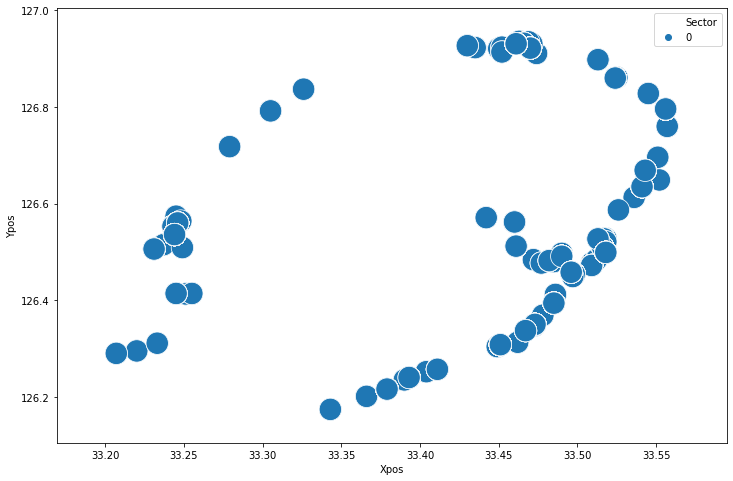

In [26]:
Scatter(OneSector_data)

In [27]:
OneSector_data = OneSector_data.groupby(['rent_date','Sector'],as_index=False).sum()
OneSector_data = WholePreprocessing(OneSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


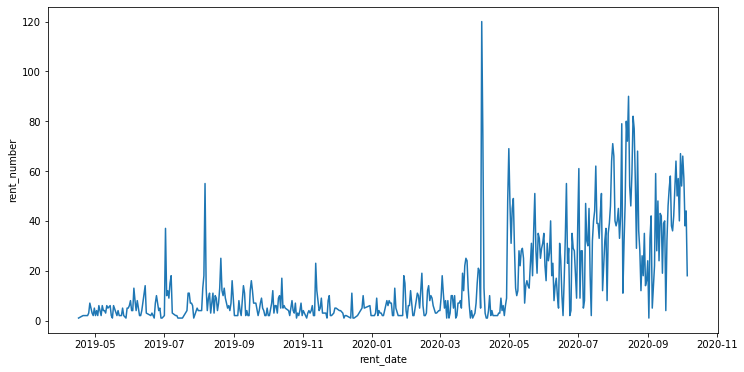

In [28]:
plt.figure(figsize=(12,6))

plt.plot(OneSector_data['rent_date'],OneSector_data['rent_number'])
plt.xlabel('rent_date')
plt.ylabel('rent_number')

plt.show()

In [29]:
OneSector_data['rain'] = OneSector_data['rain'].astype(str).astype(int)

In [30]:
xlf,X_train,X_test,y_train,y_test = model_training(OneSector_data,0.2)

In [31]:
original_y_test_index,xgb_preds = PrintResult(y_test,xlf,X_test)

RMSE:  13.115278354491355
R2 SCORE 0.47


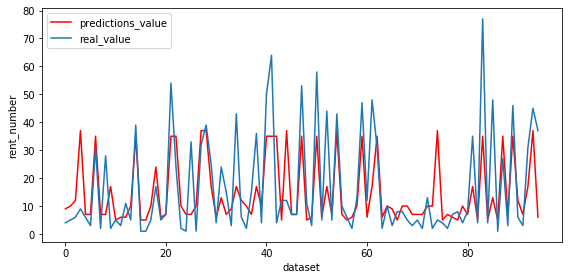

In [32]:
Plot(xgb_preds,y_test)